# Part 1: Data Exploration and Visualization (Getting to know your data)

## Setup of our Notebook

In [2]:
#Imports
import pandas as pd
import urllib
import urllib.request
import numpy as np
import tarfile
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
#Function to load data
def data_loader():
    path_url = 'https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/airline_passenger_satisfaction.csv'
    return pd.read_csv(path_url)
    
data = data_loader()
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,1
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,4
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,4
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,4
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,4


In [5]:
# Display a concise summary of the DataFrame, non-null entries, data types, and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

This table gives us a quick overview of the dataset's structure, including the presence of any missing values, the types of data we are dealing with, and how much memory it occupies. This information is crucial for guiding further data analysis steps.

In [6]:
# Generate descriptive statistics for the numerical columns in the DataFrame, including count, mean, standard deviation, min, and max values.
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,3.068278
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.993292
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


This summary provides a good snapshot of the dataset’s structure, helping us understand the central tendencies and variability in the data.

In [7]:
# This helps us understand the size of the dataset.
data.shape

(129880, 25)

This summary says we have 129,880 rows and 25 Columns (Features)

In [8]:
# Get unique values for categorical columns
for col in data.select_dtypes(include=['object']).columns:
    print(f'{col}:', data[col].unique())

Gender: ['Male' 'Female']
Customer Type: ['First-time' 'Returning']
Type of Travel: ['Business' 'Personal']
Class: ['Business' 'Economy' 'Economy Plus']
Satisfaction: ['Neutral or Dissatisfied' 'Satisfied']


In [9]:
# Map the 'Satisfaction' column from strings to numerical values (binary encoding)
satisfaction_mapping = {
    'Neutral or Dissatisfied': 0,
    'Satisfied': 1
}

# Apply the mapping to the 'Satisfaction' column in the original DataFrame and save the result in datacopy_1
datacopy_1 = data.copy(deep=True)
datacopy_1['Satisfaction'] = datacopy_1['Satisfaction'].replace(satisfaction_mapping)

# Check the first few rows of datacopy_1 to ensure the changes were applied
datacopy_1.head()


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,0,1
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,1,4
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,1,4
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,1,4
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,1,4


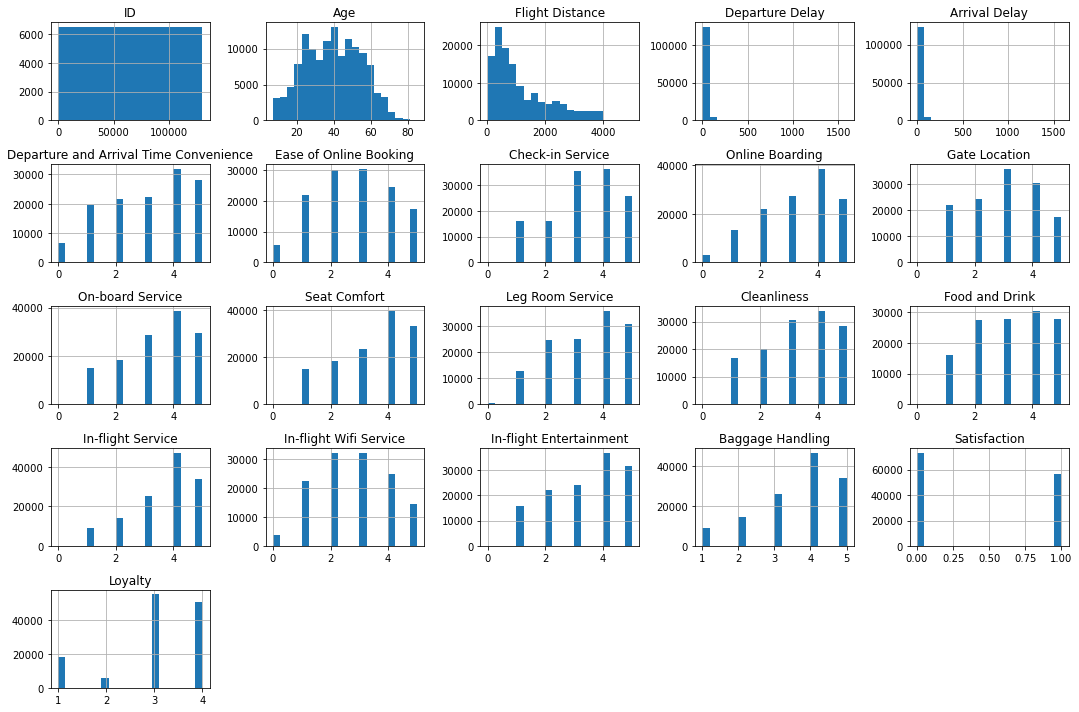

In [10]:
# Plot histogram for numerical columns
datacopy_1.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Cleaning our Data

In [11]:
# Drop the ID column
datacopy_2 = datacopy_1.drop('ID', axis=1)

# Check the first few rows to confirm it's removed
print(datacopy_2.head())

   Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0    Male   48    First-time       Business  Business              821   
1  Female   35     Returning       Business  Business              821   
2    Male   41     Returning       Business  Business              853   
3    Male   50     Returning       Business  Business             1905   
4  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  ...  Seat Comfort  Leg Room Service  Cleanliness  \
0            

In [12]:
print(datacopy_2.isnull().sum())

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

We have 393 null in Arrival Delay, also important to note that As the data description states, all the survey's features with null values was recorded as 0, so we have to replace them with nulls and try to impute them.

In [13]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Step 1: Create a deep copy of the original dataset
datacopy_3 = datacopy_2.copy(deep=True)

# Step 2: Replace 0 with NaN for all columns except 'Satisfaction'
columns_to_replace = datacopy_3.drop(['Satisfaction'], axis=1).columns
datacopy_1[columns_to_replace] = datacopy_1[columns_to_replace].replace(0, np.nan)

# Step 3: Initialize datacopy_4 as a deep copy of datacopy_3
datacopy_4 = datacopy_3.copy(deep=True)

# Step 4: Initialize the SimpleImputer with the 'median' strategy
imputer = SimpleImputer(strategy='median')

# Step 5: Drop categorical columns and 'Satisfaction' from imputation
columns_to_impute = datacopy_4.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'], axis=1)

# Apply the imputer
mid_filled = imputer.fit_transform(columns_to_impute)

# Convert mid_filled to DataFrame with matching column names
mid_filled = pd.DataFrame(mid_filled, columns=columns_to_impute.columns)

# Step 6: Update datacopy_2 with the imputed values in the relevant columns
datacopy_4.update(mid_filled)

# Step 7: Ensure Satisfaction's 0 values are kept as "Dissatisfied"
datacopy_4['Satisfaction'] = datacopy_3['Satisfaction']

# Step 8: Check for any remaining missing values in datacopy_2
print(datacopy_4.isnull().sum())

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

### Dealing with Outliers

We identified three columns—Flight Distance, Departure Delay, and Arrival Delay—that are likely to contain outliers, so we will focus on examining these.

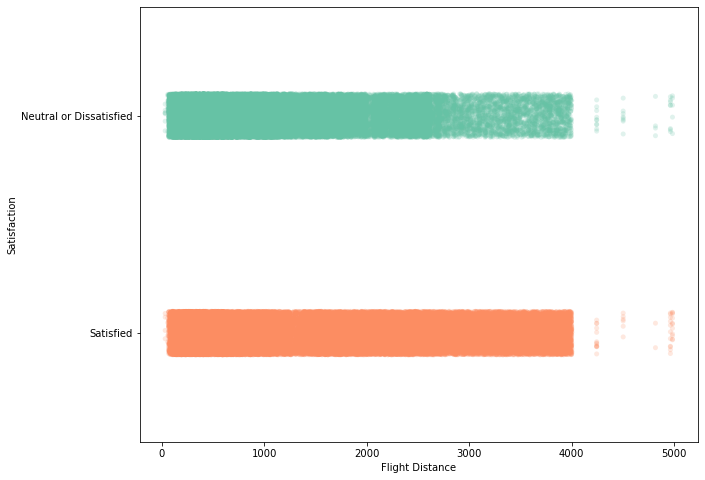

In [14]:
# Set the figure size for the plot (increased slightly for better visibility)
plt.figure(figsize=(10, 8))

# Create a strip plot to analyze the relationship between Flight Distance and Satisfaction levels
sns.stripplot(data=data, y='Satisfaction', x='Flight Distance', palette='Set2', alpha=0.2)

# Render the plot
plt.show()

Flight Distance Looks Normal

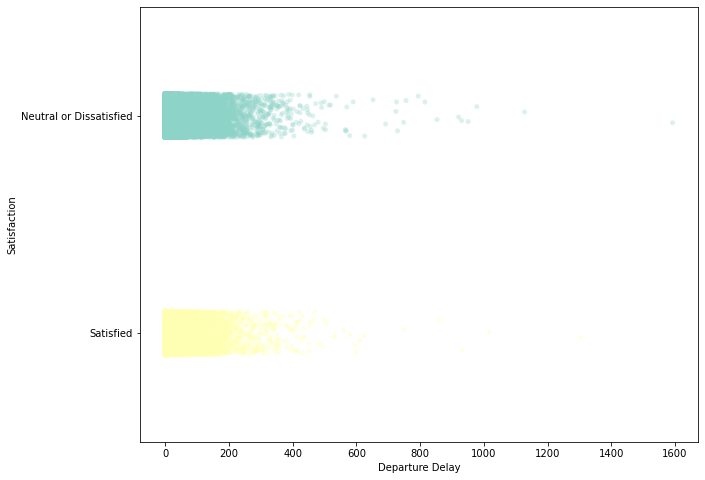

In [15]:
# Set the figure size slightly larger to improve readability
plt.figure(figsize=(10, 8))

# Create a strip plot to examine the relationship between Departure Delay and Satisfaction
# A different color palette 'Set3' is used for variety, and alpha=0.3 increases transparency to reduce overlap in dense areas
sns.stripplot(data=data, y='Satisfaction', x='Departure Delay', palette='Set3', alpha=0.3)

# Display the plot
plt.show()

Although we cannot automatically classify the distant data points as outliers since they represent actual recorded values, eliminating some of them could enhance the efficiency of our modeling. Therefore, we will remove observations where the value exceeds 900.

In [16]:
# Set a new threshold for removing observations
threshold_value = 900 

In [17]:
# Create a deep copy of the dataset
datacopy_5 = datacopy_4.copy(deep=True)

# Remove observations where the Departure Delay exceeds 800
datacopy_5.drop(datacopy_5[datacopy_5['Departure Delay'] > threshold_value].index, inplace=True)

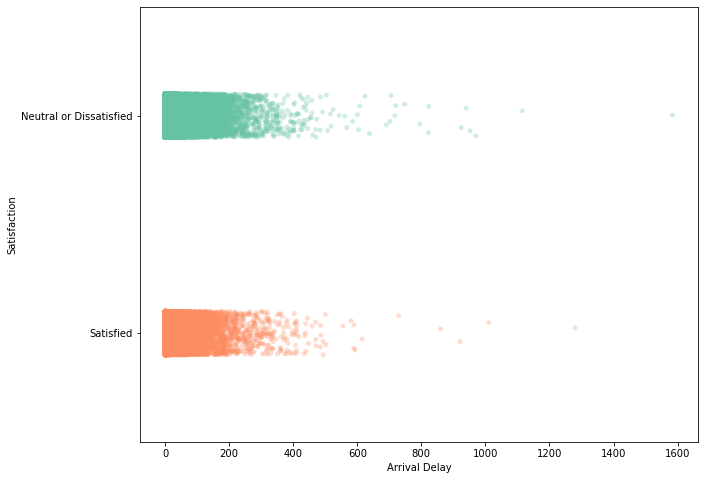

In [18]:
# Set the figure size slightly larger for better visualization
plt.figure(figsize=(10, 8))

# Create a strip plot to visualize the relationship between Arrival Delay and Satisfaction
# Using a different color palette 'Set2' for variety, and increasing transparency to 0.3 for better visibility of overlapping points
sns.stripplot(data=data, y='Satisfaction', x='Arrival Delay', palette='Set2', alpha=0.3)

# Display the plot
plt.show()

The same situation happen here as Departure colmun, so we will drop observations > 800 too.

In [19]:
# Remove observations where the Arrival Delay exceeds 800
datacopy_5.drop(datacopy_5[datacopy_5['Arrival Delay'] > threshold_value].index, inplace=True)

# Visualizing Our Data

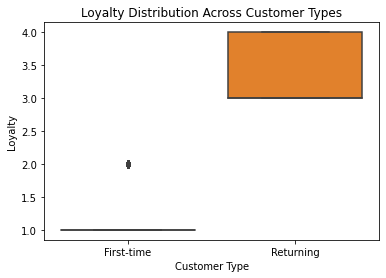

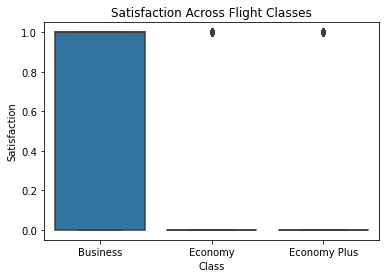

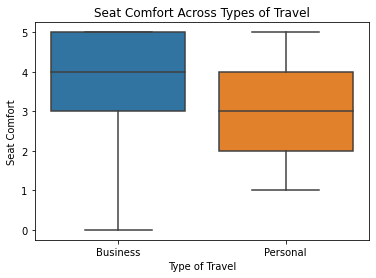

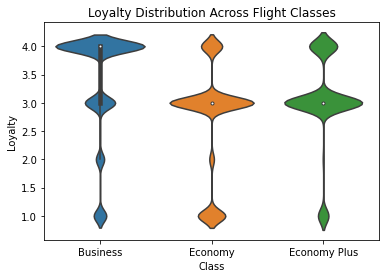

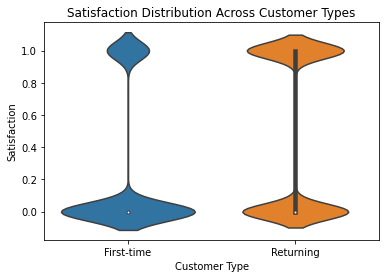

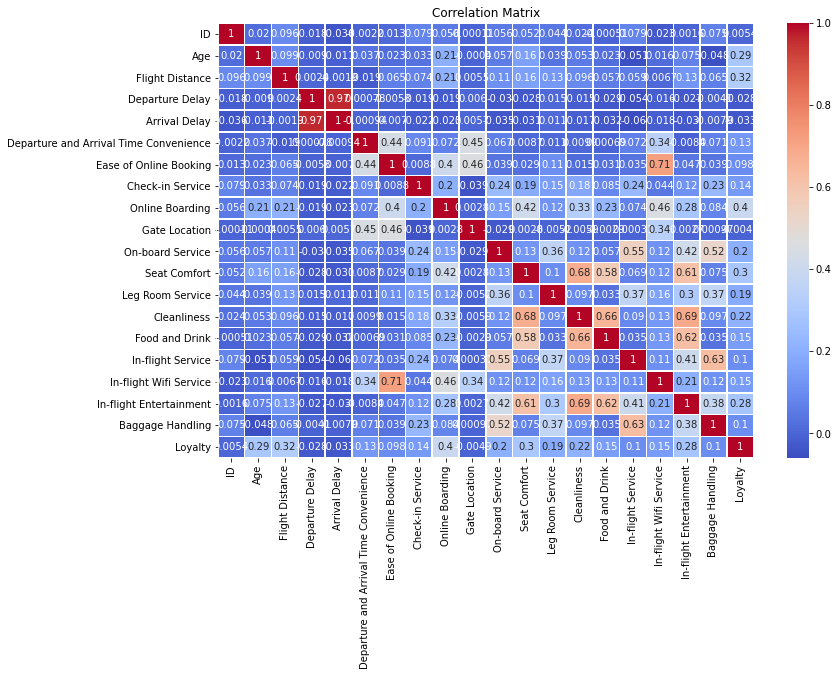

In [20]:
# Boxplot to visualize the distribution of Loyalty across different Customer Types
sns.boxplot(x='Customer Type', y='Loyalty', data=datacopy_5)
plt.title('Loyalty Distribution Across Customer Types')
plt.show()

# Boxplot to visualize the Satisfaction levels across different Flight Classes
sns.boxplot(x='Class', y='Satisfaction', data=datacopy_5)
plt.title('Satisfaction Across Flight Classes')
plt.show()

# Boxplot to show Seat Comfort ratings across different Types of Travel
sns.boxplot(x='Type of Travel', y='Seat Comfort', data=datacopy_5)
plt.title('Seat Comfort Across Types of Travel')
plt.show()

# Violin plot to visualize the distribution of Loyalty across Flight Classes
sns.violinplot(x='Class', y='Loyalty', data=datacopy_5)
plt.title('Loyalty Distribution Across Flight Classes')
plt.show()

# Violin plot to visualize the distribution of Satisfaction across Customer Types
sns.violinplot(x='Customer Type', y='Satisfaction', data=datacopy_5)
plt.title('Satisfaction Distribution Across Customer Types')
plt.show()

# Correlation matrix heatmap to visualize relationships between numerical features
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Top-Level Summary of All the Visuals with Important and Interesting Points

## 1. Loyalty Distribution Across Customer Types (Box Plot)
- **Observation**: Returning customers exhibit significantly higher loyalty compared to first-time customers, as shown by a higher median loyalty score for returning customers.
- **Key Insight**: Customer loyalty programs or incentives seem to have a strong positive effect on returning customers, which highlights the importance of maintaining long-term customer relationships.

## 2. Satisfaction Across Flight Classes (Box Plot)
- **Observation**: Business class passengers report much higher satisfaction than passengers in Economy or Economy Plus classes.
- **Key Insight**: There is a clear correlation between flight class and satisfaction, with premium service offerings in Business class resulting in higher satisfaction levels. This highlights the importance of service quality on customer satisfaction.

## 3. Seat Comfort Across Types of Travel (Box Plot)
- **Observation**: Seat comfort ratings are generally higher for business travelers compared to personal travelers. There’s also greater variability in the comfort experiences of personal travelers.
- **Key Insight**: Business travelers may have higher expectations or access to better seating arrangements, while personal travelers might experience more inconsistent seating conditions.

## 4. Loyalty and Satisfaction Distribution Across Flight Classes and Customer Types (Violin Plots)
- **Observation**: Violin plots reveal the full distribution of loyalty and satisfaction scores, showing multiple peaks. For instance, Business class passengers tend to cluster around higher loyalty scores, while Economy and Economy Plus classes have more distributed loyalty scores.
- **Key Insight**: Loyalty and satisfaction are heavily influenced by flight class. The shapes of the violins indicate some segments of Economy passengers experience higher satisfaction, but the majority lean towards lower scores.

## 5. Correlation Matrix
- **Observation**: Some features show strong correlations. For example, **Departure Delay** and **Arrival Delay** are highly correlated (**0.97**), while **Seat Comfort** and **Leg Room Service** also share a strong positive relationship (**0.68**).
- **Key Insight**: Certain factors such as delays and seat comfort are closely related to other variables and can influence the overall passenger experience. Variables like online booking and gate location have weaker correlations, suggesting that these features have a more limited impact on loyalty and satisfaction.

---


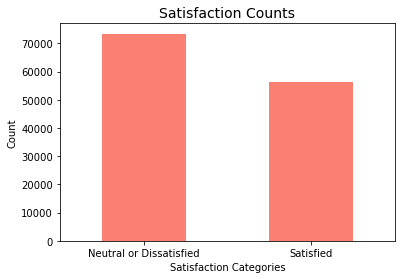

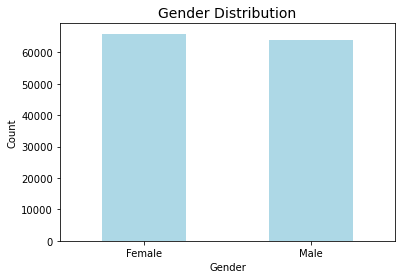

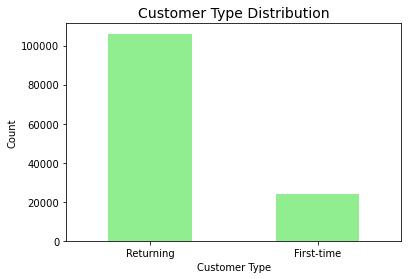

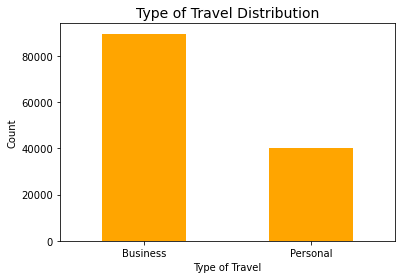

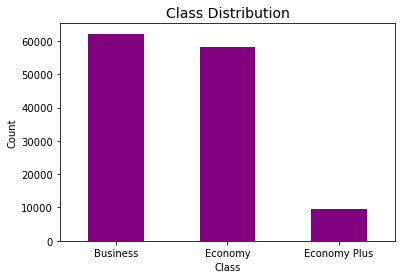

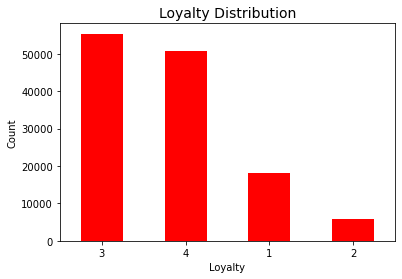

In [21]:
# Bar plot for the 'Satisfaction' column
data['Satisfaction'].value_counts().plot(kind='bar', color='salmon')
plt.title('Satisfaction Counts', fontsize=14)
plt.xlabel('Satisfaction Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for the 'Gender' column
data['Gender'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for the 'Customer Type' column
data['Customer Type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Customer Type Distribution', fontsize=14)
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for the 'Type of Travel' column
data['Type of Travel'].value_counts().plot(kind='bar', color='orange')
plt.title('Type of Travel Distribution', fontsize=14)
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for the 'Class' column
data['Class'].value_counts().plot(kind='bar', color='purple')
plt.title('Class Distribution', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for the 'Loyalty' column
data['Loyalty'].value_counts().plot(kind='bar', color='red')
plt.title('Loyalty Distribution', fontsize=14)
plt.xlabel('Loyalty')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Top-Level Summary of the Images

## 1. Type of Travel Distribution
- **Observation**: The majority of passengers are traveling for business purposes, with around 90,000 business travelers compared to approximately 40,000 personal travelers.
- **Key Insight**: Business travelers dominate the dataset, which could imply that travel preferences, satisfaction, and loyalty are largely influenced by business-related factors.

## 2. Class Distribution
- **Observation**: Business and Economy class have a similar distribution of passengers, with both around 60,000 passengers, while Economy Plus is significantly less represented.
- **Key Insight**: The lower representation of Economy Plus may indicate it is a niche category or less accessible compared to the more traditional Business and Economy classes.

## 3. Loyalty Distribution
- **Observation**: Loyalty scores are concentrated around 3 and 4, with very few passengers falling under the lower loyalty categories of 1 and 2.
- **Key Insight**: Most passengers exhibit moderate to high loyalty, suggesting that overall, passengers tend to have positive experiences, but there's room for improvement in pushing more passengers towards the highest loyalty score.

## 4. Satisfaction Counts
- **Observation**: The dataset shows more passengers being **Neutral or Dissatisfied** than **Satisfied**. Around 70,000 passengers fall into the dissatisfied category, while approximately 55,000 are satisfied.
- **Key Insight**: While satisfaction is relatively high, a significant portion of passengers are neutral or dissatisfied, suggesting there are opportunities to improve customer experiences.

## 5. Gender Distribution
- **Observation**: Gender distribution is nearly equal, with a slight male majority. Both genders are represented by around 60,000 passengers each.
- **Key Insight**: The balanced gender distribution suggests that any analysis or customer insights drawn from the data are likely to be representative of both male and female passengers.

## 6. Customer Type Distribution
- **Observation**: **Returning customers** make up the vast majority of the dataset, with around 100,000 passengers, compared to approximately 25,000 **First-time** customers.
- **Key Insight**: The high number of returning customers indicates that many passengers are repeat flyers, which highlights the importance of retaining customers and improving their overall loyalty and satisfaction.



In [22]:
# Select only numerical columns from the DataFrame
numerical_data = datacopy_5.select_dtypes(include=[np.number])

# Now calculate the correlation matrix, focusing only on the numerical columns
corr_matrix = numerical_data.corr()
print(corr_matrix)

                                             Age  Flight Distance  \
Age                                     1.000000         0.099458   
Flight Distance                         0.099458         1.000000   
Departure Delay                        -0.009173         0.001391   
Arrival Delay                          -0.011404        -0.003092   
Departure and Arrival Time Convenience  0.036983        -0.018918   
Ease of Online Booking                  0.022548         0.065169   
Check-in Service                        0.033443         0.073610   
Online Boarding                         0.207550         0.214836   
Gate Location                          -0.000416         0.005521   
On-board Service                        0.057073         0.111186   
Seat Comfort                            0.159115         0.157674   
Leg Room Service                        0.039119         0.134526   
Cleanliness                             0.052536         0.095650   
Food and Drink                    

In [23]:
# Select only numerical columns from the DataFrame
numerical_data = datacopy_5.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Sort and print the correlation of all attributes with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"].sort_values(ascending=False)
print(loyalty_correlations)

# Output the most correlated attributes with 'Loyalty'
# This will show you the attributes most positively and negatively correlated with 'Loyalty'

Loyalty                                   1.000000
Satisfaction                              0.643886
Online Boarding                           0.397663
Flight Distance                           0.324743
Seat Comfort                              0.295768
Age                                       0.288218
In-flight Entertainment                   0.281302
Cleanliness                               0.216550
On-board Service                          0.202984
Leg Room Service                          0.192394
Food and Drink                            0.149836
In-flight Wifi Service                    0.145955
Check-in Service                          0.142739
Departure and Arrival Time Convenience    0.134025
Baggage Handling                          0.104736
In-flight Service                         0.104080
Ease of Online Booking                    0.098352
Gate Location                            -0.004872
Departure Delay                          -0.029324
Arrival Delay                  

In [24]:
# Calculate the correlation matrix for the dataset stored in datacopy_5
# This will help identify the relationships between numerical variables in the dataset
correlation_matrix = datacopy_5.corr()

# Display the correlation matrix for further analysis
correlation_matrix


,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
Age,1.000000,0.099458,-0.009173,-0.011404,0.036983,0.022548,0.033443,0.207550,-0.000416,0.057073,0.159115,0.039119,0.052536,0.023177,-0.051361,0.016103,0.074959,-0.047976,0.134086,0.288218
Flight Distance,0.099458,1.000000,0.001391,-0.003092,-0.018918,0.065169,0.073610,0.214836,0.005521,0.111186,0.157674,0.134526,0.095650,0.057055,0.059324,0.006717,0.130513,0.064859,0.298081,0.324743
Departure Delay,-0.009173,0.001391,1.000000,0.956986,0.000604,-0.005059,-0.018614,-0.019894,0.006686,-0.031891,-0.027959,0.014140,-0.014334,-0.029412,-0.055298,-0.015441,-0.028086,-0.005059,-0.051841,-0.029324
Arrival Delay,-0.011404,-0.003092,0.956986,1.000000,-0.001229,-0.006844,-0.021613,-0.023231,0.006327,-0.036166,-0.030412,0.010868,-0.016393,-0.031983,-0.060666,-0.017313,-0.031316,-0.009036,-0.059406,-0.033816
Departure and Arrival Time Convenience,0.036983,-0.018918,0.000604,-0.001229,1.000000,0.437618,0.091178,0.072336,0.447509,0.067306,0.008706,0.010627,0.009900,0.000715,0.072206,0.344922,-0.008398,0.070838,-0.054250,0.134025
Ease of Online Booking,0.022548,0.065169,-0.005059,-0.006844,0.437618,1.000000,0.008810,0.404893,0.460020,0.039074,0.028552,0.109469,0.015116,0.030512,0.035385,0.714812,0.046578,0.039176,0.168892,0.098352
Check-in Service,0.033443,0.073610,-0.018614,-0.021613,0.091178,0.008810,1.000000,0.204163,-0.039346,0.244608,0.189886,0.152674,0.176565,0.085122,0.237591,0.043723,0.119548,0.234512,0.237216,0.142739
Online Boarding,0.207550,0.214836,-0.019894,-0.023231,0.072336,0.404893,0.204163,1.000000,0.002766,0.154218,0.419203,0.123198,0.329317,0.233453,0.074043,0.457447,0.283939,0.083532,0.501747,0.397663
Gate Location,-0.000416,0.005521,0.006686,0.006327,0.447509,0.460020,-0.039346,0.002766,1.000000,-0.029007,0.002796,-0.005159,-0.005908,-0.002866,0.000316,0.338564,0.002763,0.001008,-0.002785,-0.004872
On-board Service,0.057073,0.111186,-0.031891,-0.036166,0.067306,0.039074,0.244608,0.154218,-0.029007,1.000000,0.130527,0.357730,0.122063,0.057380,0.551568,0.119917,0.418579,0.520311,0.322214,0.202984


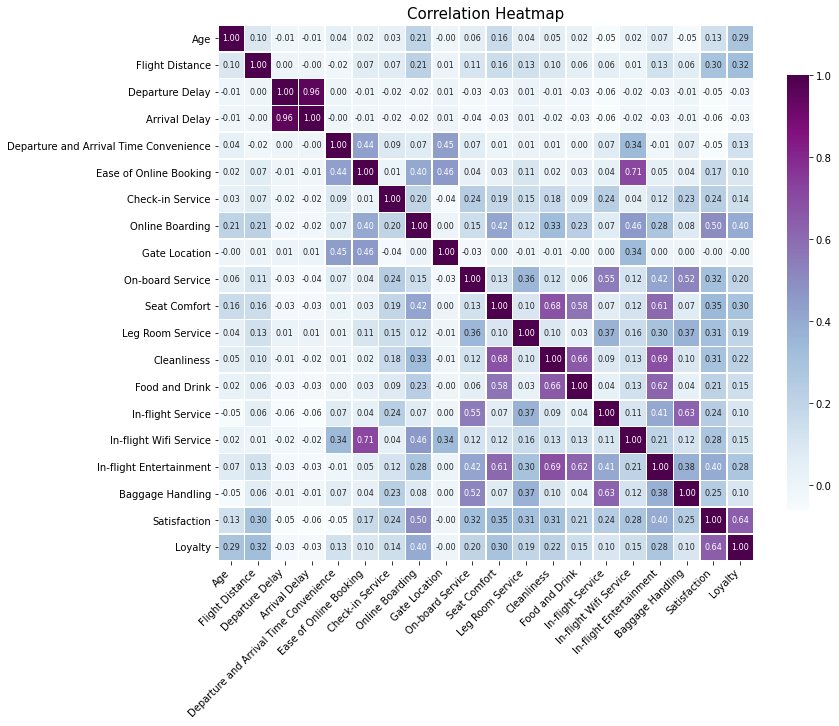

In [25]:
# Set the figure size to make the heatmap more readable
plt.figure(figsize=(12, 10))

# Plotting the heatmap with better settings for readability
sns.heatmap(correlation_matrix, 
            square=True, 
            cmap='BuPu', 
            annot=True, 
            linewidths=0.5, 
            fmt='.2f',   # Limit the decimal places in annotations to 2
            cbar_kws={'shrink': 0.8},  # Shrink color bar for better fit
            annot_kws={"size": 8})    # Adjust annotation size

# Set the title and rotate the labels for readability
plt.title('Correlation Heatmap', size=15)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels and adjust font size
plt.yticks(rotation=0, fontsize=10)  # Keep y labels horizontal and adjust font size
plt.show()


The correlation heatmap highlights several interesting relationships between features in the dataset. One of the strongest correlations is observed between Departure Delay and Arrival Delay, with a correlation coefficient of 0.96, indicating that when there is a departure delay, it is highly likely to result in an arrival delay. Additionally, there is a notable positive correlation between Seat Comfort and Leg Room Service (0.68), suggesting that passengers who rate their seat comfort highly tend to also rate legroom favorably. On the other hand, Age and Loyalty have a weaker correlation (0.29), showing that age has a modest impact on passenger loyalty. Overall, the heatmap reveals which features are most strongly related, which can help identify important factors for further analysis.

In [26]:
# Filter the correlation matrix to display only pairs with correlation greater than 0.5
# while keeping only the upper triangle to avoid duplicate pairs
filtered_corr = correlation_matrix.where(np.triu(correlation_matrix > 0.5, k=1))

# Stack the filtered correlations and sort them in descending order
strong_corr_pairs = filtered_corr.stack().sort_values(ascending=False)

# Display the result to identify the strongest correlations between variables
strong_corr_pairs


Departure Delay         Arrival Delay              0.956986
Ease of Online Booking  In-flight Wifi Service     0.714812
Cleanliness             In-flight Entertainment    0.692552
Seat Comfort            Cleanliness                0.679578
Cleanliness             Food and Drink             0.658034
Satisfaction            Loyalty                    0.643886
In-flight Service       Baggage Handling           0.629272
Food and Drink          In-flight Entertainment    0.623497
Seat Comfort            In-flight Entertainment    0.611875
                        Food and Drink             0.575817
On-board Service        In-flight Service          0.551568
                        Baggage Handling           0.520311
Online Boarding         Satisfaction               0.501747
dtype: float64

The correlations underscore the importance of operational efficiency (e.g., managing delays), service quality (e.g., in-flight services, cleanliness, and comfort), and convenience (e.g., online booking and Wi-Fi) in shaping customer loyalty and satisfaction. These insights can help prioritize improvements in specific areas to enhance the overall passenger experience.

## Let us analze further how flight delays affect satisfaction of cutomers

In [27]:
# Group the data by the 'Satisfaction' column and calculate the mean 'Arrival Delay' for each satisfaction level
mean_arrival_delay_by_satisfaction = datacopy_5.groupby('Satisfaction')['Arrival Delay'].mean()

# Display the result to understand the average arrival delay for each level of satisfaction
mean_arrival_delay_by_satisfaction


Satisfaction
0    16.916374
1    12.440744
Name: Arrival Delay, dtype: float64

Passengers who are dissatisfied tend to experience longer arrival delays on average compared to satisfied passengers. This suggests that delays play a significant role in reducing passenger satisfaction, and minimizing delays could lead to improved satisfaction levels.

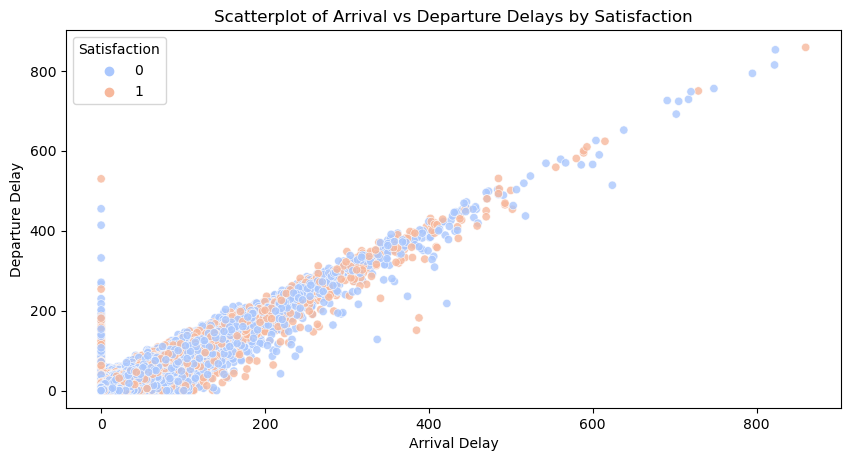

In [28]:
# Set the figure size and DPI for better quality
plt.figure(figsize=(10, 5), dpi=100)

# Plot a scatterplot to visualize the relationship between Arrival Delay and Departure Delay, colored by Satisfaction
sns.scatterplot(data=datacopy_5, x='Arrival Delay', y='Departure Delay', hue='Satisfaction', palette='coolwarm', alpha=0.8)

# Display the plot
plt.title('Scatterplot of Arrival vs Departure Delays by Satisfaction')
plt.show()

This plot confirms that minimizing delays is crucial to improving passenger satisfaction, as longer delays are strongly associated with dissatisfaction.

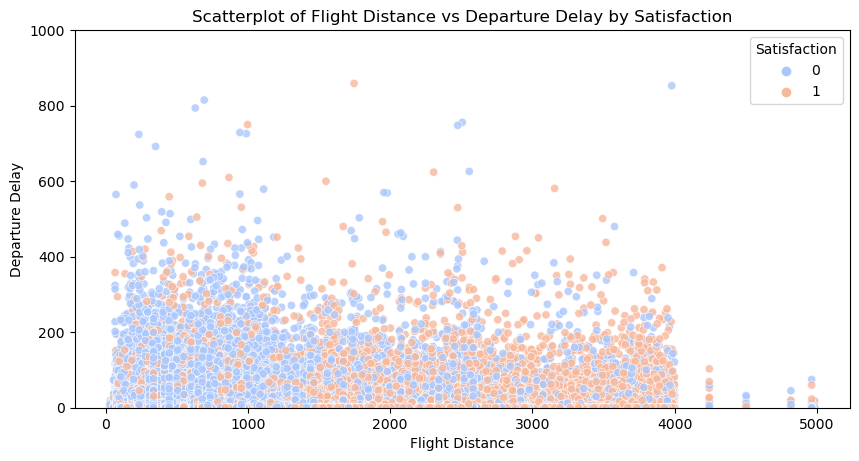

In [29]:
# Set the figure size and DPI for better quality
plt.figure(figsize=(10, 5), dpi=100)

# Plot a scatterplot to visualize the relationship between Flight Distance and Departure Delay, colored by Satisfaction
sns.scatterplot(data=datacopy_5, x='Flight Distance', y='Departure Delay', hue='Satisfaction', palette='coolwarm', alpha=0.8)

# Set the limit for the y-axis to cap at 1000 for better visualization
plt.ylim(0, 1000)

# Display the plot
plt.title('Scatterplot of Flight Distance vs Departure Delay by Satisfaction')
plt.show()



The main takeaway from this plot is that passengers on longer flights tend to be more accepting of slight delays, which suggests that delays have less of an impact on their satisfaction. In contrast, short-distance travelers appear to be more sensitive to departure delays, which could negatively impact their experience. Interestingly, despite the delays, there is still a mix of satisfied and dissatisfied passengers across both short and long flights. This indicates that other factors, like in-flight service or seating comfort, could be playing a key role in maintaining satisfaction even when delays occur. Therefore, while minimizing delays is important, enhancing the overall travel experience is equally critical, particularly for shorter flights.

In [30]:
# Calculate the mean satisfaction for each class for further analysis
mean_satisfaction_by_class = datacopy_5.groupby('Class')['Satisfaction'].mean()

# Display the mean satisfaction by flight class
print(mean_satisfaction_by_class)

Class
Business        0.694452
Economy         0.187682
Economy Plus    0.246414
Name: Satisfaction, dtype: float64


The results show that Business class passengers have a significantly higher average satisfaction score (0.69) compared to Economy (0.19) and Economy Plus (0.25). This indicates that passengers flying in Business class are generally much more satisfied with their experience, while Economy and Economy Plus passengers tend to report lower satisfaction levels. This disparity could be attributed to the enhanced services, comfort, and amenities typically offered in Business class compared to the other classes.

In [31]:
# Group the data by 'Class' and calculate the mean for each class across all numerical columns
class_means = datacopy_5.groupby('Class').mean()

# Display the result to analyze the average values for each class
class_means

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
Class,,,,,,,,,,,,,,,,,,,,
Business,41.617064,1676.060961,14.208514,14.356598,2.907890,2.915645,3.520996,3.719037,2.985118,3.682530,3.763716,3.646008,3.481980,3.329955,3.846333,2.775960,3.639347,3.844837,0.694452,3.397448
Economy,37.207320,743.970243,15.021181,15.501921,3.192553,2.602974,3.124515,2.814719,2.969609,3.119679,3.141906,3.083748,3.104912,3.086629,3.466504,2.673996,3.096542,3.450571,0.187682,2.720012
Economy Plus,38.728934,747.089151,15.122835,15.751142,3.209967,2.661991,3.014557,2.885559,2.968441,3.036234,3.168207,3.056211,3.118478,3.110403,3.382850,2.756030,3.120497,3.351504,0.246414,3.051960


The results show that Business class passengers are significantly more satisfied due to better service, comfort, and amenities. Economy and Economy Plus passengers report lower satisfaction, particularly in areas like seat comfort and service quality. Addressing these aspects in lower classes could help improve overall passenger satisfaction and loyalty.

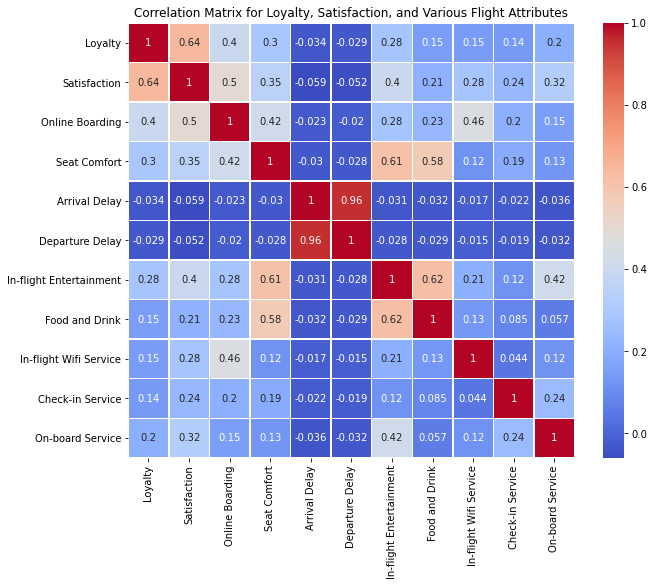

In [32]:
# Select more numerical attributes based on your analysis
attributes = [
    "Loyalty", 
    "Satisfaction", 
    "Online Boarding", 
    "Seat Comfort", 
    "Class", 
    "Arrival Delay", 
    "Departure Delay", 
    "In-flight Entertainment", 
    "Food and Drink", 
    "In-flight Wifi Service", 
    "Check-in Service", 
    "On-board Service"
]

# Calculate the correlation matrix for the selected attributes
corr_matrix = datacopy_5[attributes].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Loyalty, Satisfaction, and Various Flight Attributes')
plt.show()

This heatmap shows the correlations between **Loyalty**, **Satisfaction**, and various flight attributes:

- **Loyalty and Satisfaction**: There is a **strong positive correlation** of **0.64** between **Loyalty** and **Satisfaction**, indicating that satisfied passengers are more likely to be loyal.
  
- **Satisfaction and Online Boarding**: **Satisfaction** has a significant correlation of **0.50** with **Online Boarding**, suggesting that ease and convenience during boarding play a role in overall satisfaction.

- **Seat Comfort and Satisfaction**: **Seat Comfort** is correlated with **Satisfaction** at **0.35**, meaning that better seating contributes positively to passenger satisfaction.

- **Arrival Delay and Departure Delay**: These two metrics have the strongest correlation of **0.96**, reflecting that longer departure delays almost always lead to longer arrival delays. However, both have a very low correlation with **Satisfaction**, showing that delays, while frustrating, are not the biggest drivers of dissatisfaction.

- **In-flight Services**: **In-flight Entertainment** (0.62) and **Food and Drink** (0.62) are strongly correlated with one another, indicating that passengers often rate these services similarly. However, their correlation with **Satisfaction** is moderate, suggesting that while important, these services alone are not the main drivers of satisfaction.

### Conclusion:
The strongest drivers of **Satisfaction** appear to be **Online Boarding**, **Seat Comfort**, and **In-flight Services**. The high correlation between **Loyalty** and **Satisfaction** emphasizes the importance of focusing on overall satisfaction to retain loyal passengers. Improving these key service areas may lead to increased satisfaction and, consequently, higher loyalty.


## Experimenting with Attribute Combinations

In [33]:
# New Feature 1: Service Quality Score (sum of key service aspects)
datacopy_5['service_quality_score'] = (
    datacopy_5['Check-in Service'] + 
    datacopy_5['Online Boarding'] + 
    datacopy_5['On-board Service'] + 
    datacopy_5['Seat Comfort'] + 
    datacopy_5['In-flight Entertainment'] + 
    datacopy_5['Cleanliness']
)

# New Feature 2: Delay Impact Score (combines departure and arrival delays)
datacopy_5['delay_impact_score'] = (
    datacopy_5['Departure Delay'] + datacopy_5['Arrival Delay'].fillna(0)  # Handling missing arrival delays
)

# New Feature 3: Comfort vs. Duration Ratio (Seat Comfort relative to Flight Distance)
datacopy_5['comfort_vs_duration'] = datacopy_5['Seat Comfort'] / datacopy_5['Flight Distance']

# New Feature 4: Total In-flight Experience (sum of in-flight services)
datacopy_5['total_inflight_experience'] = (
    datacopy_5['In-flight Wifi Service'] + 
    datacopy_5['In-flight Entertainment'] + 
    datacopy_5['In-flight Service'] + 
    datacopy_5['Food and Drink']
)

# Checking the first few rows of the newly created features
print(datacopy_5[['service_quality_score', 'delay_impact_score', 'comfort_vs_duration', 'total_inflight_experience']].head())

   service_quality_score  delay_impact_score  comfort_vs_duration  \
0                   25.0                 7.0             0.006090   
1                   27.0                65.0             0.004872   
2                   25.0                 0.0             0.005862   
3                   26.0                 0.0             0.002625   
4                   23.0                 1.0             0.001153   

   total_inflight_experience  
0                       18.0  
1                       15.0  
2                       15.0  
3                       16.0  
4                       13.0  


Passengers generally rate the service quality highly across the dataset, which indicates that areas like check-in, seat comfort, and cleanliness are strengths.
Delays are a significant issue for some passengers, and this variability can affect overall satisfaction.
Comfort has a diminishing impact on longer flights, which could suggest that amenities like in-flight entertainment and service become more important as flight distances increase.

In [34]:
# Recalculate the correlation matrix after adding the new features
corr_matrix = datacopy_5.corr()

# Sort and print the correlations of all attributes with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"].sort_values(ascending=False)
print(loyalty_correlations)


Loyalty                                   1.000000
Satisfaction                              0.643886
Online Boarding                           0.397663
service_quality_score                     0.391192
Flight Distance                           0.324743
Seat Comfort                              0.295768
Age                                       0.288218
In-flight Entertainment                   0.281302
total_inflight_experience                 0.258884
Cleanliness                               0.216550
On-board Service                          0.202984
Leg Room Service                          0.192394
Food and Drink                            0.149836
In-flight Wifi Service                    0.145955
Check-in Service                          0.142739
Departure and Arrival Time Convenience    0.134025
Baggage Handling                          0.104736
In-flight Service                         0.104080
Ease of Online Booking                    0.098352
Gate Location                  

In [35]:
# Recalculate the correlation matrix
corr_matrix = datacopy_5.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)


Loyalty                                   1.000000
Satisfaction                              0.643886
Online Boarding                           0.397663
service_quality_score                     0.391192
Flight Distance                           0.324743
Seat Comfort                              0.295768
Age                                       0.288218
In-flight Entertainment                   0.281302
total_inflight_experience                 0.258884
Cleanliness                               0.216550
On-board Service                          0.202984
Leg Room Service                          0.192394
Food and Drink                            0.149836
In-flight Wifi Service                    0.145955
Check-in Service                          0.142739
Departure and Arrival Time Convenience    0.134025
Baggage Handling                          0.104736
In-flight Service                         0.104080
Ease of Online Booking                    0.098352
comfort_vs_duration            

In [36]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Convert categorical variables to numeric using One-Hot Encoding
X = datacopy_5.drop('Loyalty', axis=1)  # Features
y = datacopy_5['Loyalty']               # Target variable

# One-Hot Encode categorical columns (you can specify the categorical columns if needed)
X_encoded = pd.get_dummies(X)

# Create a logistic regression estimator
estimator = LogisticRegression(max_iter=10000, solver='saga')

# Perform feature selection using RFE
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_encoded, y)

# Get the selected feature indices and names
selected_feature_indices = selector.support_
selected_feature_names = X_encoded.columns[selected_feature_indices]

print("Selected features:", selected_feature_names)


Selected features: Index(['Online Boarding', 'In-flight Entertainment', 'Satisfaction',
       'Customer Type_First-time', 'Customer Type_Returning',
       'Type of Travel_Business', 'Type of Travel_Personal', 'Class_Business',
       'Class_Economy', 'Class_Economy Plus'],
      dtype='object')


Overall, satisfaction remains the most influential factor driving passenger loyalty. In addition to satisfaction, service quality and boarding efficiency play significant roles in fostering loyalty. Meanwhile, delays—though having a less pronounced impact—still lead to customer disloyalty and should be addressed to improve retention. Airlines should focus on enhancing service quality and minimizing delays to maintain a loyal customer base.